In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ตรวจสอบข้อมูล Data Understanding

ตรวจสอบ games.csv 

In [63]:
#ตรวจสอบข้อมูล games.csv
df_games = pd.read_csv('games.csv')
df_games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [51]:
print(df_games.dtypes)

app_id              int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
dtype: object


In [4]:
# เช็คว่ามีข้อมูลว่างใน DataFrame 
missing_data_count = df_games.isnull().sum()
print("จำนวนข้อมูลว่างในแต่ละคอลัมน์:")
print(missing_data_count)

จำนวนข้อมูลว่างในแต่ละคอลัมน์:
app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64


In [67]:
new_df_games = df_games.drop_duplicates(subset=['title'])
print("รายชื่อเกมที่ไม่ซ้ำกัน:")
new_df_games


รายชื่อเกมที่ไม่ซ้ำกัน:


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [103]:
rating_positive_stats = new_df_games.groupby('rating')['positive_ratio'].agg(['count', 'mean', 'median', 'min', 'max'])

print("สถิติของ positive_ratio ตาม rating:")
print(rating_positive_stats)


สถิติของ positive_ratio ตาม rating:
                         count       mean  median  min  max
rating                                                     
Mixed                    12106  57.648274    60.0   40   69
Mostly Negative           1836  31.294662    32.0   20   39
Mostly Positive           8728  74.555568    75.0   70   79
Negative                   302  11.890728    13.0    0   19
Overwhelmingly Negative     14  14.214286    15.0    9   18
Overwhelmingly Positive   1110  96.240541    96.0   95  100
Positive                 13469  91.208701    91.0   80  100
Very Negative               60  13.633333    14.0    5   19
Very Positive            13126  88.802834    89.0   80  100


In [104]:
very_positive_games = new_df_games[new_df_games['rating'] == 'Very Positive']
print("เกมที่มีคะแนนรีวิวเป็น 'Very Positive':")
very_positive_games


เกมที่มีคะแนนรีวิวเป็น 'Very Positive':


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50863,1341490,Hellsweeper VR,2023-09-21,True,False,False,Very Positive,80,94,30.00,0.00,0.0,True
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [102]:
unique_ratings = new_df_games['rating'].unique()
print("Rating ที่ไม่ซ้ำกัน:")
print(unique_ratings)

Rating ที่ไม่ซ้ำกัน:
['Very Positive' 'Positive' 'Mixed' 'Mostly Positive'
 'Overwhelmingly Positive' 'Negative' 'Mostly Negative'
 'Overwhelmingly Negative' 'Very Negative']


ตรวจสอบ recommendations.csv 

In [6]:
#ตรวจสอบข้อมูล recommendations.csv
df_recommendations = pd.read_csv('recommendations.csv')
df_recommendations
# print(df_recommendations.dtypes) 

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
...,...,...,...,...,...,...,...,...
41154789,633230,0,0,2021-02-15,True,41.0,1606890,41154789
41154790,758870,8,0,2019-07-18,False,8.0,1786254,41154790
41154791,696170,3,10,2018-03-26,False,2.0,6370324,41154791
41154792,696170,0,0,2018-06-11,True,4.0,1044289,41154792


In [52]:
print(df_recommendations.dtypes)

app_id              int64
helpful             int64
funny               int64
date               object
is_recommended       bool
hours             float64
user_id             int64
review_id           int64
dtype: object


In [16]:
# เช็คว่ามีข้อมูลว่างใน DataFrame 
missing_data_count = df_recommendations.isnull().sum()
print("จำนวนข้อมูลว่างในแต่ละคอลัมน์:")
print(missing_data_count)

จำนวนข้อมูลว่างในแต่ละคอลัมน์:
app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64


In [73]:
#นับจำนวนครั้งของแต่ละ app_id ที่ซ้ำกันแล้วแสดงผลลัพธ์ออกมาเป็น Series ที่ประกอบด้วย app_id และจำนวนครั้งที่ซ้ำกันสำหรับแต่ละ app_id
duplicated_app_ids = df_recommendations.groupby('app_id').size().reset_index(name='count')
# กรองเฉพาะ app_id ที่มีจำนวนครั้งการซ้ำกันมากกว่าหรือเท่ากับ 2 ครั้ง
duplicated_app_ids = duplicated_app_ids[duplicated_app_ids['count'] >= 2]
print(duplicated_app_ids)

        app_id  count
0           10  41043
1           20   4284
2           30   4432
3           40   1610
4           50   9721
...        ...    ...
37604  2245840     11
37605  2245890      8
37606  2246290      5
37608  2251240      3
37609  2253290      3

[37319 rows x 2 columns]


ตรวจสอบ users.csv 

In [79]:
df_users = pd.read_csv('users.csv')
df_users

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
...,...,...,...
14306059,5047430,6,0
14306060,5048153,0,0
14306061,5059205,31,0
14306062,5074363,0,0


# Data Visualization

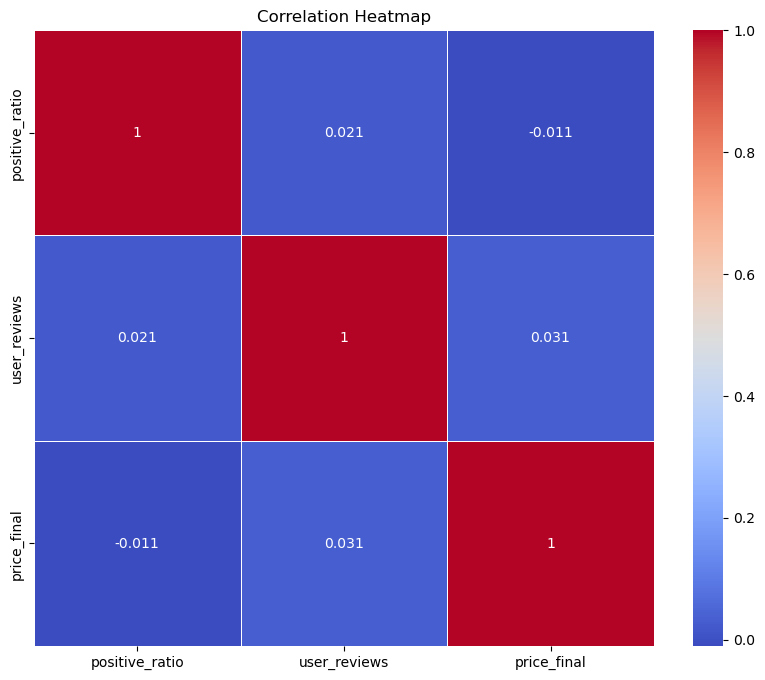

In [82]:
# สร้าง correlation matrix
corr_matrix = new_df_games[['positive_ratio', 'user_reviews', 'price_final']].corr()

# สร้าง heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## positive_ratio', 'user_reviews', 'price_final ไม่มีความสัมพันธ์กันมากนักใน DataFrame

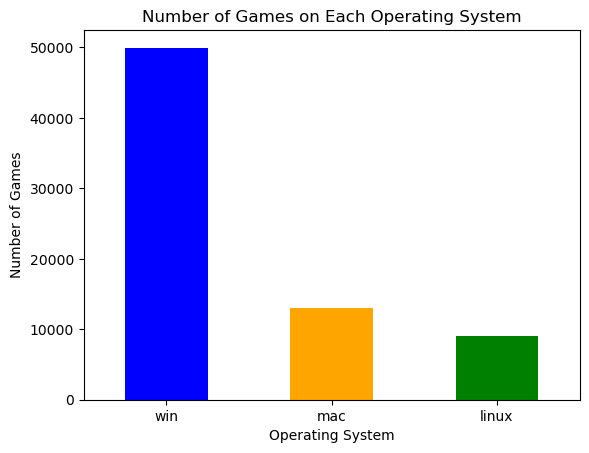

In [75]:
# จำนวนเกมที่มีในแต่ละระบบปฏิบัติการ
platform_counts = new_df_games[['win', 'mac', 'linux']].sum()
platform_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Number of Games on Each Operating System')
plt.xlabel('Operating System')
plt.ylabel('Number of Games')
plt.xticks(rotation=0)
plt.show()

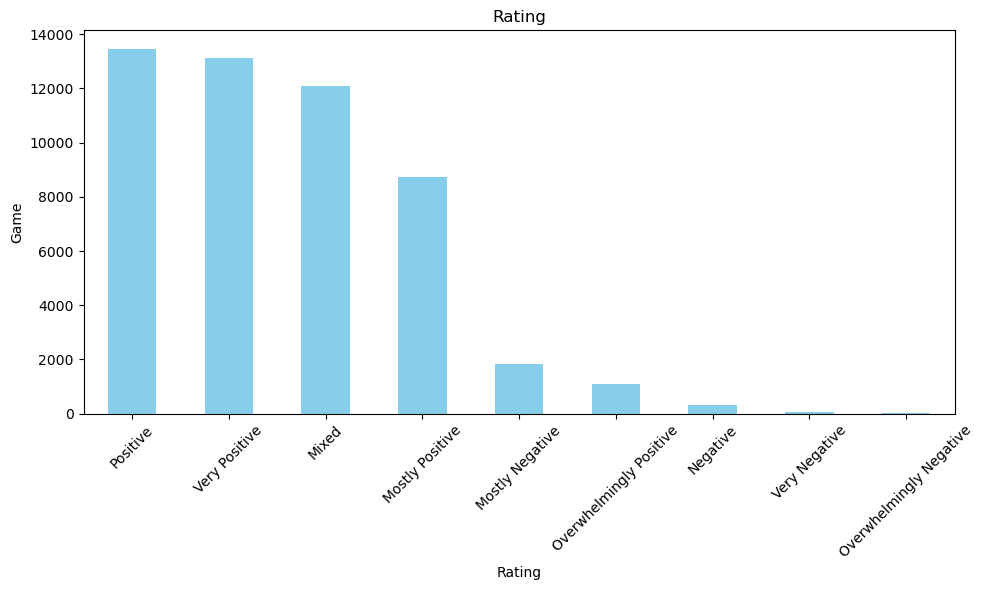

In [107]:
# นับจำนวนของเกมในแต่ละ rating
rating_counts = new_df_games['rating'].value_counts()
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('Game')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ส่วนใหญ่เกมมักจะรองรับกับ window 

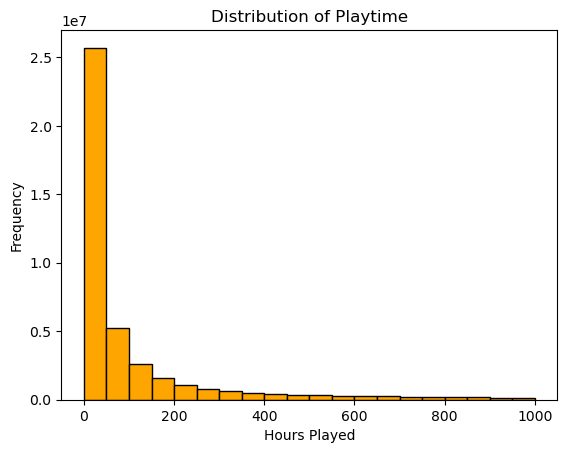

In [80]:
#เวลาเล่นเกมของผู้ใช้
plt.hist(df_recommendations['hours'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Playtime')
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.show()

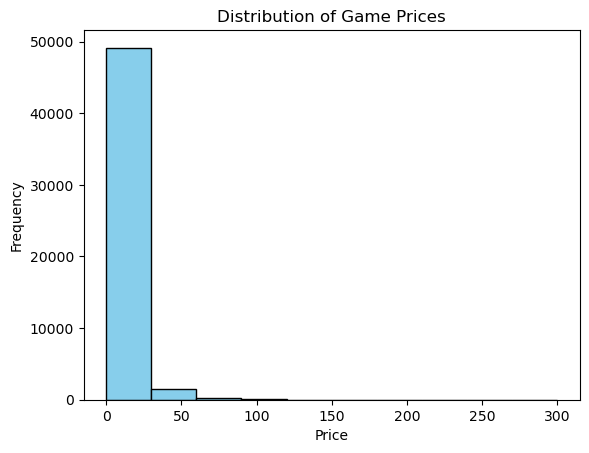

In [94]:
# นำเสนอราคาของเกม
plt.hist(df_games['price_final'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Game Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

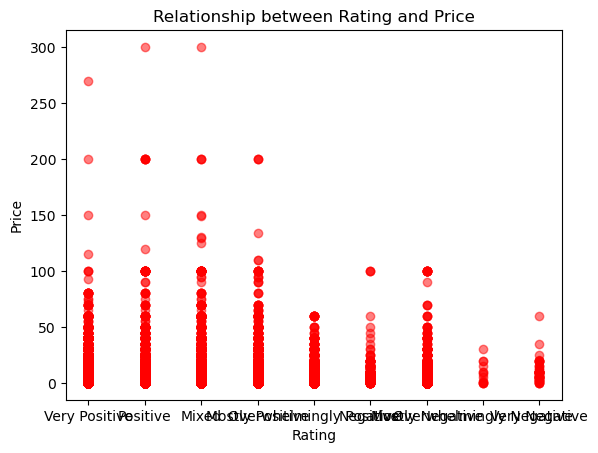

In [57]:
# ความสัมพันธ์ระหว่างราคาและคะแนน
plt.scatter(df_games['rating'], df_games['price_final'], color='red', alpha=0.5)
plt.title('Relationship between Rating and Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

## Hypothesis Testing

In [16]:
import pandas as pd

# อ่านข้อมูลจากไฟล์ CSV
df_games = pd.read_csv('games.csv')
df_recommendations = pd.read_csv('recommendations.csv')

# ทำ left join ระหว่าง games.csv และ recommendations.csv โดยใช้ app_id เป็น key
df_right_join = df_games.merge(df_recommendations, on='app_id', how='right')

# แสดงผลลัพธ์
df_right_join


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,Dwarf Fortress,2022-12-06,True,False,False,Overwhelmingly Positive,95,19665,30.00,0.00,0.0,True,0,0,2022-12-12,True,36.3,51580,0
1,304390,FOR HONOR™,2017-02-13,True,False,False,Mixed,69,82277,15.00,0.00,0.0,True,4,0,2017-02-17,False,11.5,2586,1
2,1085660,Destiny 2,2019-10-01,True,False,False,Very Positive,81,562723,0.00,0.00,0.0,True,2,0,2019-11-17,True,336.5,253880,2
3,703080,Planet Zoo,2019-11-05,True,False,False,Very Positive,90,60113,45.00,0.00,0.0,True,0,0,2022-09-23,True,27.4,259432,3
4,526870,Satisfactory,2020-06-08,True,False,False,Overwhelmingly Positive,97,119866,30.00,0.00,0.0,True,0,0,2021-01-10,True,7.9,23869,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41154789,633230,NARUTO TO BORUTO: SHINOBI STRIKER,2023-06-29,True,False,False,Very Positive,85,40328,20.00,0.00,0.0,True,0,0,2021-02-15,True,41.0,1606890,41154789
41154790,758870,Kynseed,2022-12-06,True,False,False,Very Positive,80,2125,24.99,24.99,0.0,True,8,0,2019-07-18,False,8.0,1786254,41154790
41154791,696170,SENRAN KAGURA Peach Beach Splash,2018-03-07,True,False,False,Very Positive,80,3312,29.99,29.99,0.0,True,3,10,2018-03-26,False,2.0,6370324,41154791
41154792,696170,SENRAN KAGURA Peach Beach Splash,2018-03-07,True,False,False,Very Positive,80,3312,29.99,29.99,0.0,True,0,0,2018-06-11,True,4.0,1044289,41154792


In [ ]:
# กรองข้อมูล funny ที่มีคะแนน 8-10
df_funny_high = df_left_join[(df_left_join['funny'] >= 8) & (df_left_join['funny'] <= 10)]

# แสดงผลลัพธ์
df_funny_high

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# อ่านข้อมูลจากไฟล์ CSV
df_left_join = pd.read_csv('df_left_join.csv')

# สร้าง Heatmap
plt.figure(figsize=(10, 8))
heatmap_data = df_left_join.pivot_table(index='rating', columns='price_final', values='app_id', aggfunc='count')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g')
plt.title('Heatmap of Rating vs. Game Price')
plt.xlabel('Game Price')
plt.ylabel('Rating')
plt.show()


In [12]:
import pandas as pd

# อ่านข้อมูลจากไฟล์ games.csv และ recommendations.csv
games_df = pd.read_csv('games.csv')
recommendations_df = pd.read_csv('recommendations.csv')

# ทำการ join ข้อมูลจากทั้งสองไฟล์ด้วย app_id
merged_df = pd.merge(games_df, recommendations_df, on='app_id')

# หาผลิตภัณฑ์ที่มีรีวิวสูงที่สุด
most_reviewed_product = merged_df.groupby('app_id')['review_id'].count().idxmax()

print("ผลิตภัณฑ์ที่มีรีวิวสูงที่สุดคือ:", most_reviewed_product)


ผลิตภัณฑ์ที่มีรีวิวสูงที่สุดคือ: 440


In [17]:
# เลือกเฉพาะคอลัมน์ 'app_id' ที่ซ้ำกัน
duplicate_app_ids = df_right_join[df_right_join.duplicated('app_id')]['app_id']

# แสดงผลลัพธ์
print("App IDs ที่ซ้ำกัน:")
print(duplicate_app_ids)

App IDs ที่ซ้ำกัน:
15           306130
18           289070
21          1938090
26           304390
35           431960
             ...   
41154789     633230
41154790     758870
41154791     696170
41154792     696170
41154793    1089980
Name: app_id, Length: 41117184, dtype: int64


In [19]:
reliable_data = df_right_join[df_right_join['helpful'] > 1]
reliable_data

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,helpful,funny,date,is_recommended,hours,user_id,review_id
1,304390,FOR HONOR™,2017-02-13,True,False,False,Mixed,69,82277,15.00,0.00,0.0,True,4,0,2017-02-17,False,11.5,2586,1
2,1085660,Destiny 2,2019-10-01,True,False,False,Very Positive,81,562723,0.00,0.00,0.0,True,2,0,2019-11-17,True,336.5,253880,2
13,1286830,STAR WARS™: The Old Republic™,2020-07-21,True,False,False,Very Positive,89,54766,0.00,0.00,0.0,True,2,0,2020-07-26,True,19.3,113279,13
19,392160,X4: Foundations,2018-11-30,True,False,True,Mostly Positive,76,14620,50.00,0.00,0.0,True,3,0,2018-12-26,False,320.5,408750,19
24,236850,Europa Universalis IV,2013-08-13,True,True,True,Very Positive,86,81284,40.00,0.00,0.0,True,23,4,2021-03-20,True,5.7,118252,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41154747,17440,SPORE™ Creepy & Cute Parts Pack,2008-12-19,True,False,False,Very Positive,88,1567,19.99,19.99,0.0,True,2,0,2020-08-16,True,77.0,9591860,41154747
41154782,220,Half-Life 2,2007-10-10,True,True,True,Overwhelmingly Positive,97,122230,9.99,9.99,0.0,True,2,0,2022-05-06,True,21.0,5863193,41154782
41154790,758870,Kynseed,2022-12-06,True,False,False,Very Positive,80,2125,24.99,24.99,0.0,True,8,0,2019-07-18,False,8.0,1786254,41154790
41154791,696170,SENRAN KAGURA Peach Beach Splash,2018-03-07,True,False,False,Very Positive,80,3312,29.99,29.99,0.0,True,3,10,2018-03-26,False,2.0,6370324,41154791


In [20]:
reliable_data['app_id'].nunique()

36920

In [21]:
duplicated_count = reliable_data.duplicated(subset=['app_id']).sum()
print("จำนวน app_id ที่ซ้ำกัน:", duplicated_count)


จำนวน app_id ที่ซ้ำกัน: 8656395


In [25]:
id_duplicates_count = reliable_data['app_id'].value_counts()
print(id_duplicates_count)

app_id
730        133721
570         67103
1091500     60884
359550      59731
271590      57303
            ...  
495390          1
707610          1
1263490         1
1824990         1
1547110         1
Name: count, Length: 36920, dtype: int64


In [26]:
id_title_duplicates_count = reliable_data.groupby(['app_id', 'title']).size()
print(id_title_duplicates_count)
#ไอดีเดียวกัน แต่ถ้าชื่อเกมคนละอันมันจะนับแยกใหม่

app_id   title                             
10       Counter-Strike                        13077
20       Team Fortress Classic                  1511
30       Day of Defeat                          1085
40       Deathmatch Classic                      544
50       Half-Life: Opposing Force              1562
                                               ...  
2245840  ZAVOD                                     3
2245890  Margo                                     6
2246290  Entasy Online                             4
2251240  Police Car Simulator                      3
2253290  My Grandparents' Christmas Mystery        2
Length: 36920, dtype: int64


In [40]:
app_730_data = reliable_data[reliable_data['app_id'] == 730]
print(app_730_data)

          app_id                             title date_release   win   mac  \
71           730  Counter-Strike: Global Offensive   2012-08-21  True  True   
123          730  Counter-Strike: Global Offensive   2012-08-21  True  True   
219          730  Counter-Strike: Global Offensive   2012-08-21  True  True   
336          730  Counter-Strike: Global Offensive   2012-08-21  True  True   
394          730  Counter-Strike: Global Offensive   2012-08-21  True  True   
...          ...                               ...          ...   ...   ...   
34733133     730  Counter-Strike: Global Offensive   2012-08-21  True  True   
34733136     730  Counter-Strike: Global Offensive   2012-08-21  True  True   
34733142     730  Counter-Strike: Global Offensive   2012-08-21  True  True   
34733144     730  Counter-Strike: Global Offensive   2012-08-21  True  True   
34733152     730  Counter-Strike: Global Offensive   2012-08-21  True  True   

          linux         rating  positive_ratio  use

In [34]:
id_title_duplicates_count_sorted = id_title_duplicates_count.sort_values(ascending=False)
print(id_title_duplicates_count_sorted)

app_id   title                             
730      Counter-Strike: Global Offensive      133721
570      Dota 2                                 67103
1091500  Cyberpunk 2077                         60884
359550   Tom Clancy's Rainbow Six® Siege        59731
271590   Grand Theft Auto V                     57303
                                                ...  
713090   Zombie Bloxx                               1
966760   The Yellow Quiz                            1
2018270  Ragedanger Earth                           1
2018260  DUCK Mission                               1
1637110  MoneyFalls - Coin Pusher Simulator         1
Length: 36920, dtype: int64


In [43]:
# สร้าง DataFrame ของ id_duplicates_count จาก reliable_data['app_id'].value_counts()
id_duplicates_count = reliable_data['app_id'].value_counts().reset_index()

id_duplicates_count.columns = ['app_id', 'reliable_reviews_count']

id_duplicates_count


,app_id,reliable_reviews_count
0,730,133721
1,570,67103
2,1091500,60884
3,359550,59731
4,271590,57303
...,...,...
36915,495390,1
36916,707610,1
36917,1263490,1
36918,1824990,1


In [44]:
# สร้าง DataFrame จาก games.csv
games_data = pd.read_csv('games.csv')

# Left join ระหว่าง id_duplicates_count และ games_data
merged_data = pd.merge(id_duplicates_count, games_data, on='app_id', how='left')

# พิมพ์ผลลัพธ์
merged_data


,app_id,reliable_reviews_count,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,730,133721,Counter-Strike: Global Offensive,2012-08-21,True,True,True,Very Positive,88,7494460,15.00,0.00,0.0,True
1,570,67103,Dota 2,2013-07-09,True,True,True,Very Positive,82,2045628,0.00,0.00,0.0,True
2,1091500,60884,Cyberpunk 2077,2020-12-09,True,False,False,Very Positive,80,557051,60.00,0.00,0.0,True
3,359550,59731,Tom Clancy's Rainbow Six® Siege,2015-12-01,True,False,False,Very Positive,86,993312,20.00,0.00,0.0,True
4,271590,57303,Grand Theft Auto V,2015-04-13,True,False,False,Very Positive,86,1484122,0.00,0.00,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36915,495390,1,The Wire Loop Game VR,2016-08-08,True,False,False,Mostly Positive,70,10,4.99,4.99,0.0,True
36916,707610,1,Food Mahjong,2017-09-17,True,False,False,Mixed,60,10,0.39,1.99,80.0,True
36917,1263490,1,Sweet Solitaire: School Witch,2020-04-27,True,False,False,Mostly Positive,76,13,4.99,4.99,0.0,True
36918,1824990,1,Marmalade box,2021-12-15,True,False,False,Positive,100,10,19.99,19.99,0.0,True
